In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve,auc
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
input_dict = {'TFBS': '../GTRD_sites/analysis/classification/new_labels_TFBS_log_reg_bootstrap/TFBS_results/',
             'ATAC_short': '../ATAC_sites_sub_150bp_fragments/analysis/classification/new_labels_ATAC_short_log_reg_bootstrap/ATAC_short_results/',
             'TFBS_Ulz':'../Ulz_pipeline/merge/Ulz_new_labels_log_reg_bootstrap/Ulz_results/',
             'ATAC': '../ATAC_sites/analysis/classification/ATAC_new_labels_log_reg_bootstrap/ATAC_results/'}


In [3]:
groups = ['low_tfx','high_tfx','overall']

ATAC
          mean  lower  upper metric
group                              
low_tfx   0.68   0.34   0.96    AUC
high_tfx  0.93   0.85   0.99    AUC
overall   0.89   0.81   0.96    AUC


ATAC_short
          mean  lower  upper metric
group                              
low_tfx   0.44   0.13   0.74    AUC
high_tfx  0.80   0.66   0.92    AUC
overall   0.71   0.58   0.82    AUC


TFBS
          mean  lower  upper metric
group                              
low_tfx   0.64   0.33   0.93    AUC
high_tfx  0.77   0.64   0.89    AUC
overall   0.74   0.62   0.85    AUC


TFBS_Ulz
          mean  lower  upper metric
group                              
low_tfx   0.62   0.31   0.93    AUC
high_tfx  0.58   0.41   0.74    AUC
overall   0.58   0.44   0.72    AUC




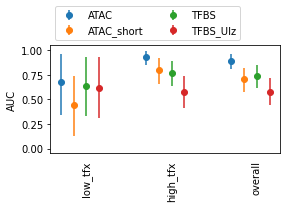

In [4]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize = (4,3))
br = np.arange(3)

metric = 'AUC'

for i,approach in enumerate(['ATAC', 'ATAC_short', 'TFBS', 'TFBS_Ulz']):    
    CI_data = pd.read_csv(input_dict[approach]+'CI_metrics.txt', sep='\t')
    CI_data = CI_data.set_index('group')
    CI_data = CI_data[CI_data['metric'] == metric]
    CI_data = np.round(CI_data,2)
    CI_data = CI_data.loc[groups]
    
    lower = CI_data['mean']-CI_data['lower']
    upper = CI_data['upper']-CI_data['mean']
    CI_intervals = np.array([lower.values,upper.values])

    print(approach)
    print(CI_data)
    print('\n')
    
    br1 = [x + i*barWidth for x in br]
    rects = plt.errorbar(br1, CI_data['mean'], yerr=CI_intervals, label = approach, fmt='o')

plt.ylabel(metric)
plt.xticks([m + barWidth*2 for m in br],
        groups)

plt.tick_params(axis = 'x', rotation=90, bottom=False)
plt.ylim(-0.05,1.05)
plt.legend(loc='lower left',bbox_to_anchor = [0,1], ncol = 2)
plt.tight_layout()
plt.savefig('MBC_subtyping_'+metric+'_barplot.pdf')

ATAC
          mean  lower  upper    metric
group                                 
low_tfx   0.64   0.38   0.89  accuracy
high_tfx  0.88   0.78   0.97  accuracy
overall   0.81   0.71   0.90  accuracy


ATAC_short
          mean  lower  upper    metric
group                                 
low_tfx   0.46   0.23   0.70  accuracy
high_tfx  0.73   0.60   0.85  accuracy
overall   0.66   0.53   0.77  accuracy


TFBS
          mean  lower  upper    metric
group                                 
low_tfx   0.61   0.36   0.85  accuracy
high_tfx  0.70   0.57   0.82  accuracy
overall   0.68   0.56   0.78  accuracy


TFBS_Ulz
          mean  lower  upper    metric
group                                 
low_tfx   0.56   0.31   0.82  accuracy
high_tfx  0.54   0.40   0.68  accuracy
overall   0.55   0.42   0.67  accuracy




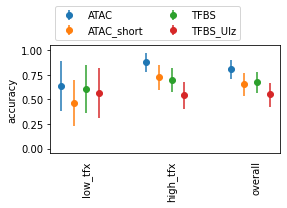

In [5]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize = (4,3))
br = np.arange(3)

metric = 'accuracy'

for i,approach in enumerate(['ATAC', 'ATAC_short', 'TFBS', 'TFBS_Ulz']):    
    CI_data = pd.read_csv(input_dict[approach]+'CI_metrics.txt', sep='\t')
    CI_data = CI_data.set_index('group')
    CI_data = CI_data[CI_data['metric'] == metric]
    CI_data = np.round(CI_data,2)
    CI_data = CI_data.loc[groups]
    
    lower = CI_data['mean']-CI_data['lower']
    upper = CI_data['upper']-CI_data['mean']
    CI_intervals = np.array([lower.values,upper.values])

    print(approach)
    print(CI_data)
    print('\n')
    
    br1 = [x + i*barWidth for x in br]
    rects = plt.errorbar(br1, CI_data['mean'], yerr=CI_intervals, label = approach, fmt='o')

plt.ylabel(metric)
plt.xticks([m + barWidth*2 for m in br],
        groups)

plt.tick_params(axis = 'x', rotation=90, bottom=False)
plt.ylim(-0.05,1.05)
plt.legend(loc='lower left',bbox_to_anchor = [0,1], ncol = 2)
plt.tight_layout()
plt.savefig('MBC_subtyping_'+metric+'_barplot.pdf')